by Adrián Barreno & Marina Ortega

# Exercise 4.1 Study the dynamics of one of the following sets of rules for two arrays of 256 and 257 cells with periodic boundary conditions.

**Set 1: 73, 136, 184**

Initial conditions:
1. A single black cell -> "start with a dot" option.
2. Half black (1) cells and half white (0) cells at randomly chosen positions
3. 25% of black (1) cells and 75% of white (0) cells (approximately)
4. 90% of black (1) cells and 10% of white (0) cells (approximately)


In [2]:
''' Script adapted from https://towardsdatascience.com/simple-but-stunning-animated-cellular-automata-in-python-c912e0c156a9 

This script generates a 2-dimensional cellular automata with 2 possible states (0/1). Each cell state is determined by its current state and the state if its
neighbor cells, following a numeric Wolfram rule that ranges from 0 to 255. The state of each cell and its neighbors for a 3-digit binary number with 8 
possible combinations (2^3). The rule number, which is converted to binary (8-bits), enconde the output of each possible 3-digit combination, determining 
the fate of each cell.

'''
import numpy as np

powers_of_two = np.array([[4], [2], [1]])  # These powers will be used to convert binary numbers into decimal

def step(x, rule_binary):               # Adapted from https://towardsdatascience.com/simple-but-stunning-animated-cellular-automata-in-python-c912e0c156a9
   
    y = np.vstack(( np.roll(x, 1),                          # Matrix containing the each position and its neighbors al left and right positions.
                    x, 
                    np.roll(x, -1))).astype(np.int8)        # stack row-wise, shape (3, cols)
    
    out_number = np.sum(powers_of_two * y, axis=0).astype(np.int8)   # The number resulting from each position and its neighbors.
    
    return rule_binary[7 - out_number]


In [59]:
def cellular_automaton(rule_number, size, steps, init_cond='random', percentage=0.5):
    assert 0 <= rule_number <= 255
    assert init_cond in ['single', 'random', "random_half", "percentage"]
    
    rule_binary = np.binary_repr(rule_number, width=8)                        # Convert the rule to binary
    rule_binary = np.array([int(ch) for ch in rule_binary], dtype=np.int8)    # Append each digit of the binary rule to an array
    
    x = np.zeros((steps, size), dtype=np.int8)                                # Generate the array that will contain the dynamics of the automaton
    
    if init_cond == 'random':  # random init of the first step
        x[0, :] = np.array(np.random.rand(size) < 0.5, dtype=np.int8)

    if init_cond == "random_half":
        ran_positions = np.random.choice(a = size, size=size//2, replace = False)
        x[0, [ran_positions]] = 1

    if init_cond == 'percentage':  # starting with a percentage of random black positions
        ran_positions = np.random.choice(a = size, size=round(size*percentage), replace = False)
        x[0, [ran_positions]] = 1
        
    if init_cond == 'single':  # starting with an initial impulse
            x[0, size // 2] = 1
    
    for i in range(steps - 1):
        x[i + 1, :] = step(x[i, :], rule_binary)
    
    return x

### Array 256 results:

In [60]:
import matplotlib.pyplot as plt

size = 200        # number of cells in one row
steps = 200       # number of time steps

rule_number = [73, 136, 184]  # select the Wolfram rule


def plot_automata(init_cond, percentage = 0.5):
    fig, axs = plt.subplots(nrows=1,ncols=3, figsize=(15, 6), dpi = 80, facecolor='w', edgecolor='k')
    fig.subplots_adjust(hspace = .5, wspace=.001)

    for i in range(len(rule_number)):

        x = cellular_automaton(rule_number[i], size, steps, init_cond, percentage)
        axs[i].imshow(x, cmap=plt.cm.binary)
        axs[i].set_axis_off()
        axs[i].set_title(f"{rule_number[i]}")
        fig.suptitle(f"{init_cond}", fontsize=18)


#### 1. A single black cell -> "start with a dot" option.

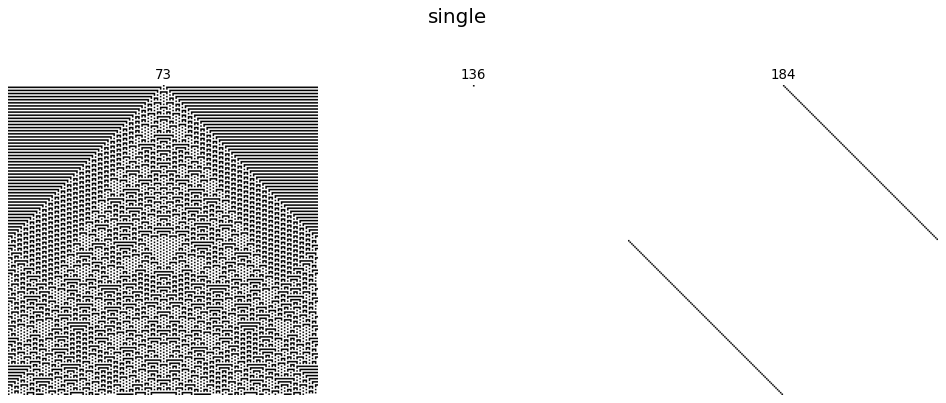

In [61]:
plot_automata(init_cond = 'single')     # start with only one cell

#### 2. Half black (1) cells and half white (0) cells at randomly chosen positions.


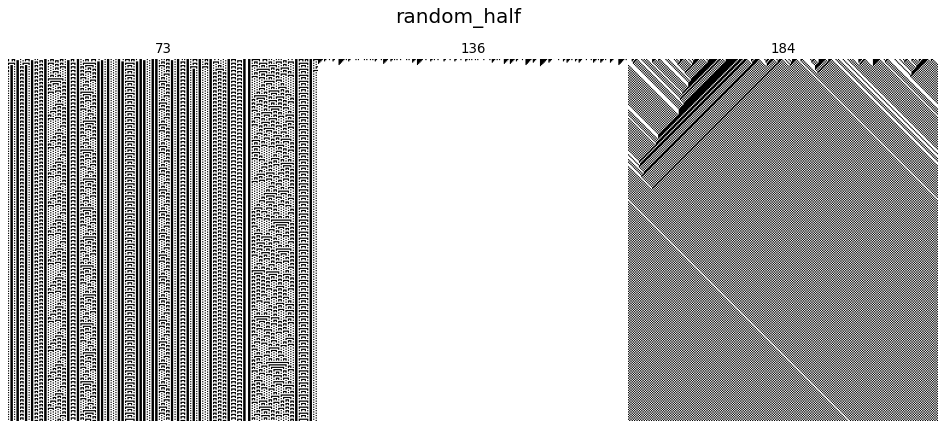

In [70]:
plot_automata(init_cond='random_half')  # start with half random cells

#### 3. 25% of black (1) cells and 75% of white (0) cells (approximately)

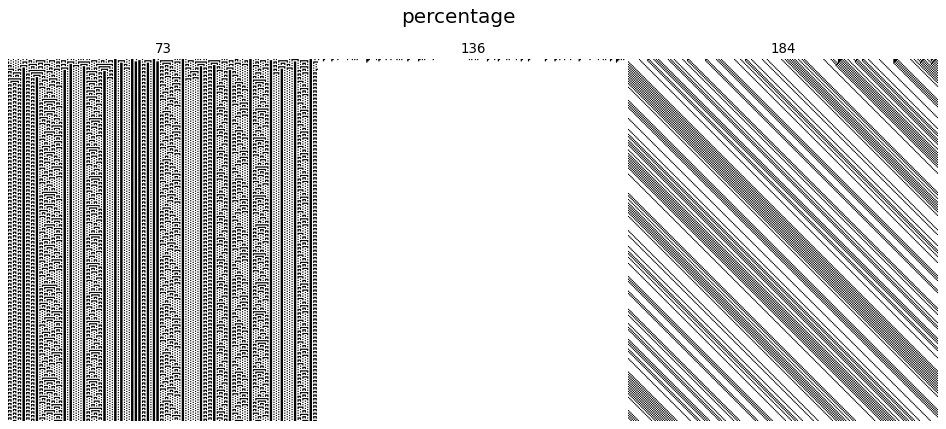

In [71]:
plot_automata(init_cond='percentage', percentage=0.25)  # start with 25% black cells

#### 4. 90% of black (1) cells and 10% of white (0) cells (approximately)

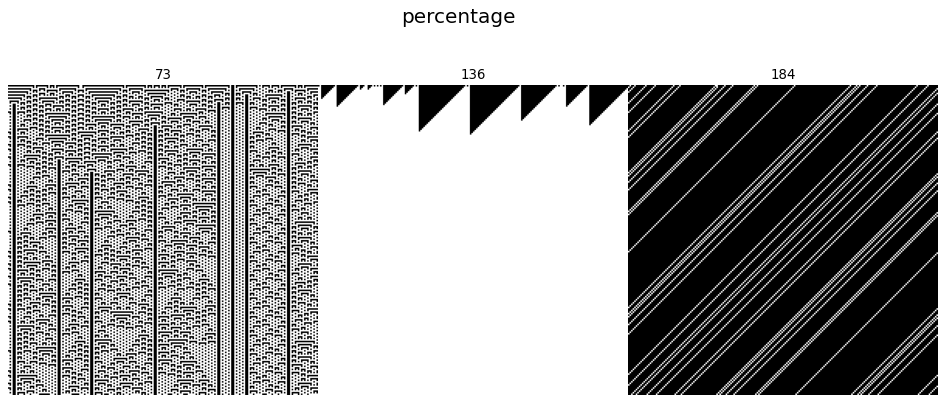

In [68]:
plot_automata(init_cond='percentage', percentage=0.90)  # start with 90% black cell


### Array 257 results:

In [69]:
import matplotlib.pyplot as plt

size = 257 # number of cells in one row (columns)
steps = 300  # number of time steps (rows)
rule_number = [73, 136, 184]  # select the update rule

#### 1. A single black cell -> "start with a dot" option.

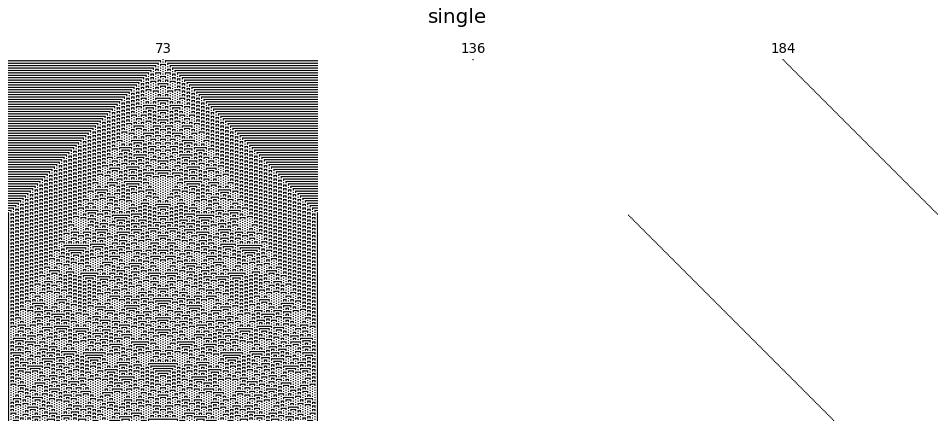

In [72]:
plot_automata(init_cond = 'single')     # start with only one cell

#### 2. Half black (1) cells and half white (0) cells at randomly chosen positions.


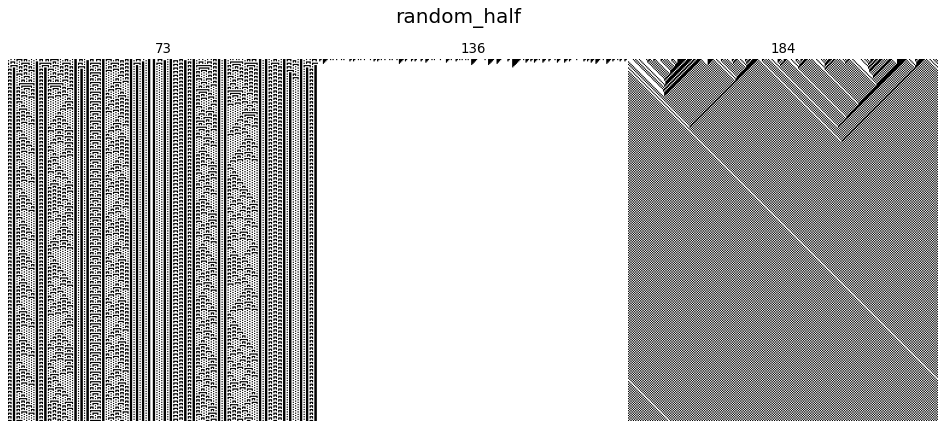

In [73]:
plot_automata(init_cond='random_half')  # start with half random cells

#### 3. 25% of black (1) cells and 75% of white (0) cells (approximately)

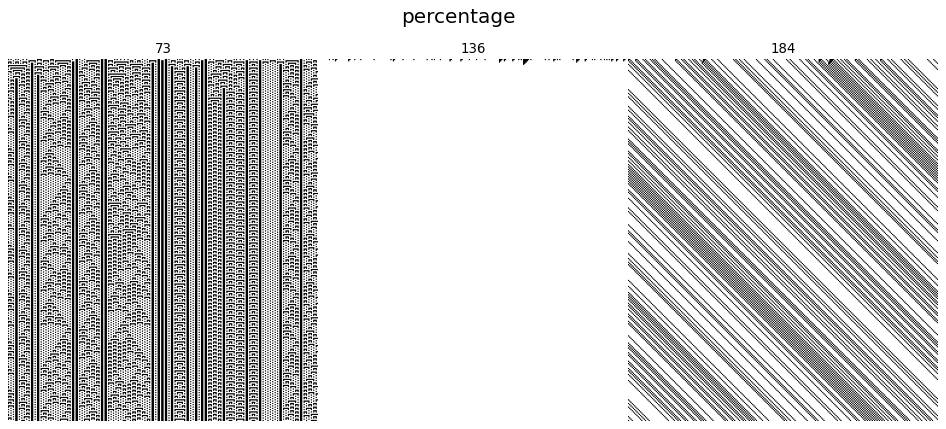

In [74]:
plot_automata(init_cond='percentage', percentage=0.25)  # start with 25% black cells

#### 4. 90% of black (1) cells and 10% of white (0) cells (approximately)

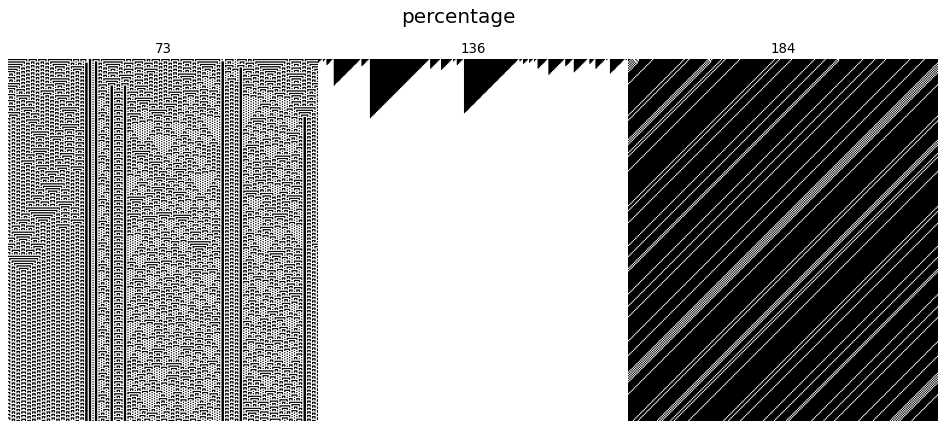

In [75]:
plot_automata(init_cond='percentage', percentage=0.90)  # start with 90% black cells

**Pay especial attention to the length of the cycles. Can you see repeated patterns? How long does it take for a pattern to repeat? Does this time vary with the array length?**

**RULE 73**

When starting the execution with a single black cell (initial condition **1**),  we see that the patterns are maintained for a certain time but that, finally, one pattern prevails (the one we see that is maintained in the central area) until at a certain point we only see that pattern.

When each cell of the initial condition is set at random (initial conditions **2**,**3** and **4**). We can see that there are areas where it takes more time to reach a certain pattern and that other areas maintain the pattern from the beginning. The different patterns that are mantainend untill the end of the ejecution are separated by some cells that mantaind the state 1 (black) forever.

**RULE 136**

In this rule, regardless of the initial condition, we see how a stable pattern of state 0 (white) is reached. The greater the number of cells with state 1 (black) in the initial condition, the longer it takes to reach this stable pattern of state 0 (white), but it always reaches it.

**RULE 184**

The patterns of **rule 184** we can see that they stabilize quickly, it is more when the number of cells with state 1 (black) is less than 50%, the pattern we can see how it stabilizes in groups of cells in state 1 (black) separated by blocks of cells in state 0 (white). The patterns can be seen to move to the right, this would be the case for conditions **1** and **3**.

If, on the other hand, the initial density of cells with state 1 (black) is higher than 50%, the pattern stabilizes in groups of cells in state 0 (white), separated by blocks of cells in state 1 (black), the patterns of this type move to the left. This would be the case for the initial condition **4**.

If the initial density is 50% state 1 and 50% state 0, the initial pattern stabilizes, more slowly than in the previous cases, and we can see how at each step it moves to the left or to the right.

[https://web.archive.org/web/20071007061217/http://www.nslij-genetics.org/wli/pub/cs87-no-figure.pdf]




---



**In the light of the results obtained, try to classify your rules into Wolfram classes. Is it easy? Where do you find difficulties?**

1. **Class 1**: Evolution leads to a homogeneous state.
2. **Class 2**: Evolution leads to a set of separated simple stable or periodic structures.
3. **Class 3**: Evolution leads to a chaotic pattern.
4. **Class 4**: Evolution leads to complex localized structures, sometimes long-lived.

We will classify the **rule 73** in the 2nd class because, as we can see, there are different possible final states (we see the differences between the initial conditions that we applied and the size of the array), but al lof this states consist in a set of simple structures that remain the same forever (as we can see in the black lines that cross the array) or repeat itself every x steps.

We classify the **rule 136** in the 1st class because evolutions leads to a homogeneous state. When the initial condition is only 1 black cell we can not even see this cell to expand, the homogeneous state remaing as 0 white. With the other initial states we can see that the black state remains for more time but finally after a short time, the state 0 white remains homogeneous. All initial patterns evolve quicky into a stable, homogeneous state, any randomness in the inital pattern disappears.


We will classify the **rule 184**  ih the 2nd class because there are different final states as the initial conditions change. But all initial patterns evolve to a stable struture, simple ones as the ones that show some lines or a repeated pattern that stabilizes after a short time.